<a href="https://colab.research.google.com/github/Ehizson/HDSC-W2023-ExtraProjects/blob/main/Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maternal Health Risk**

* **Objective**

This dataset consists of different factors such as age, systolicBP, diastolicBP, BS, heartrate, etc. These all can be used to predict health risk a pregnant woman can be potentially exposed to. I will analyze several attributes that affect the health of pregnant women. 
The aim is to create a machine learning model to predict the level of health risk for pregnant women.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#loading dataset

data = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

### **Data Preparation**

In [3]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.shape

(1014, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().any()

True

In [8]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### **Exploratory Data Analysis**

Given the project objective, Risk level is a major determinant to explore with other features to ascertain correlations in the dataset.

**Risk Level**

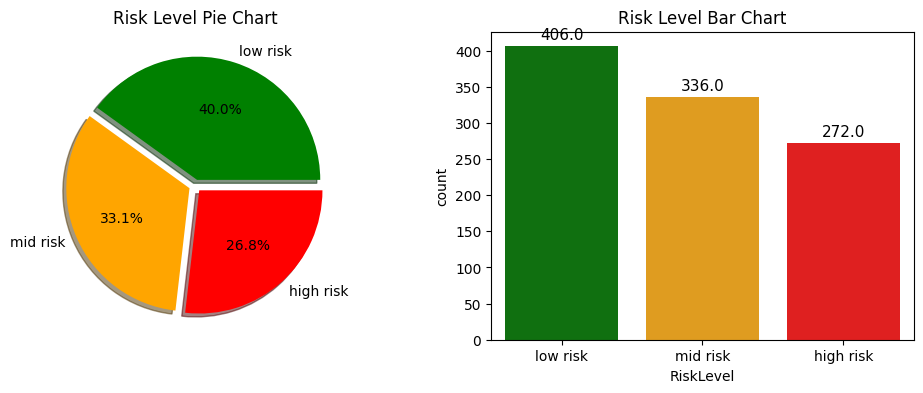

In [9]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

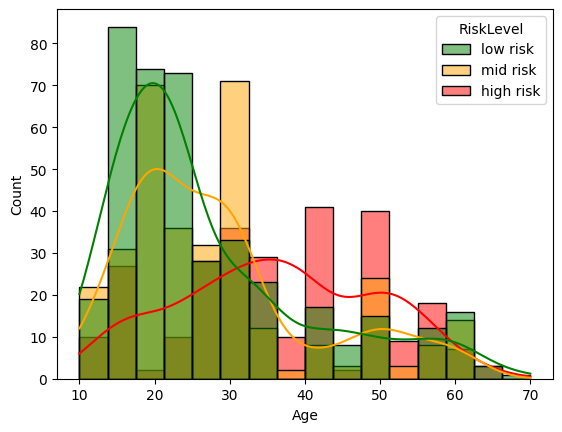

In [10]:
#Age → RiskLevel

sns.histplot(data=data, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Pregnant women below age 25 have low health risk
* Health risks for prenant women will start to increase at age 25

Blood pressure readings are given in two numbers. The top number is the maximum pressure the heart exerts while beating (systolic pressure). The bottom number is the amount of pressure in the arteries between beats (diastolic pressure).

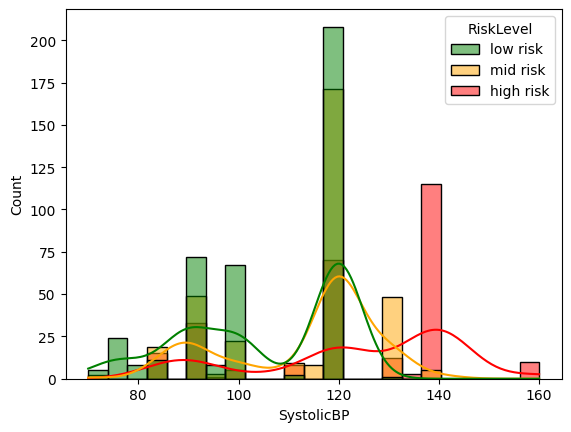

In [11]:
#SystolicBP → RiskLevel

sns.histplot(data=data, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Pregnant women will systolic BP =< 120 experience low health risk.
* Pregnant women will systolic BP >= 120 health risk start to increase.
* The higher their systolic BP, the higher their health risk.

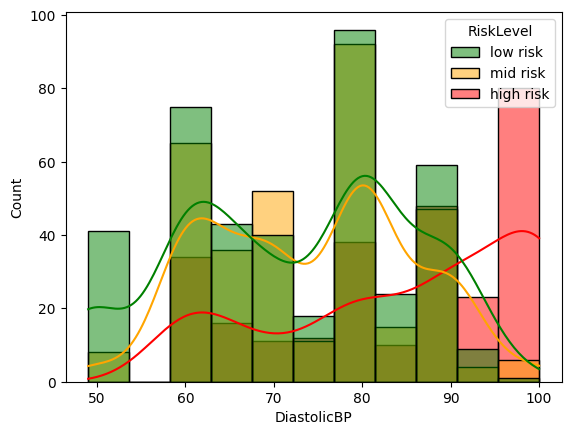

In [12]:
#DiastolicBP → RiskLevel

sns.histplot(data=data, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

Similar observation as Systolic BP
* The higher their diastolic BP, the higher their health risk.

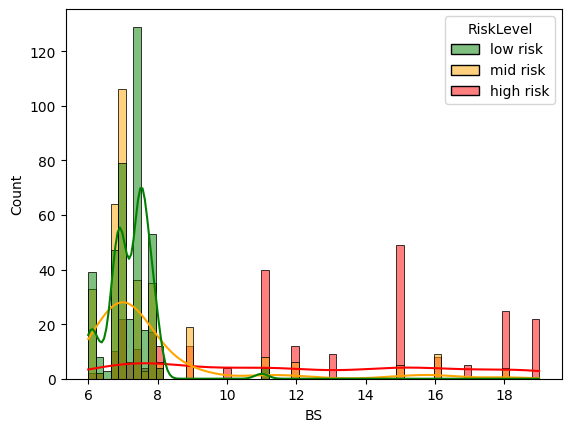

In [13]:
#BS → RiskLevel

sns.histplot(data=data, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Almost every pregnant women with blood glucose level >= 8 has high health risk.
* But otherwise, they seems to have lower health risk with blood glucose level < 8

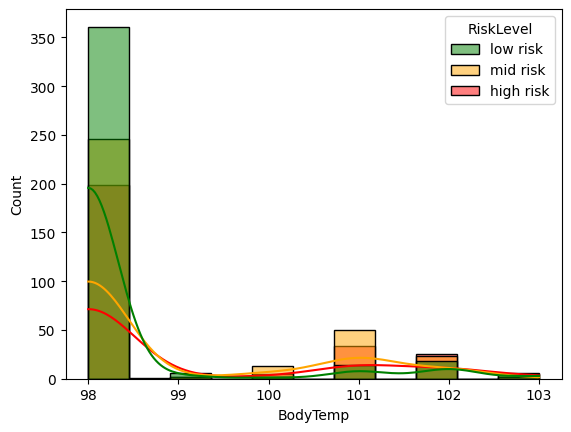

In [14]:
#bodytemp → RiskLevel

sns.histplot(data=data, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Pregnant women with body temperature >= 100 mostly has higher health risk

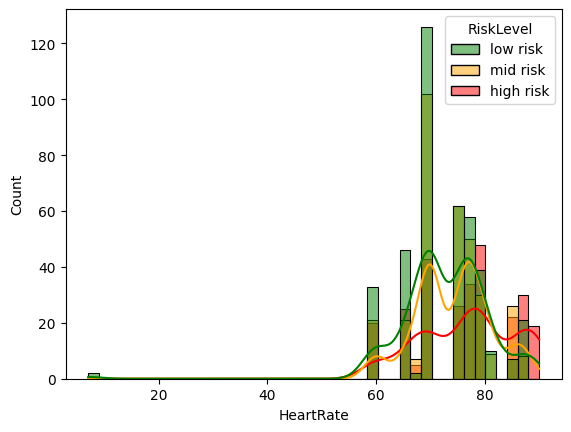

In [15]:
#Heartrate → RiskLevel

sns.histplot(data=data, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

* Health risks seem to be getting higher along with the number of heart rate

**Multivariate Analysis**

It involves analyzing multiple variables (more than two) to identify any possible association and find the relationship among them. More specifically, we will try to associate more than one predictor variable with the response variable.

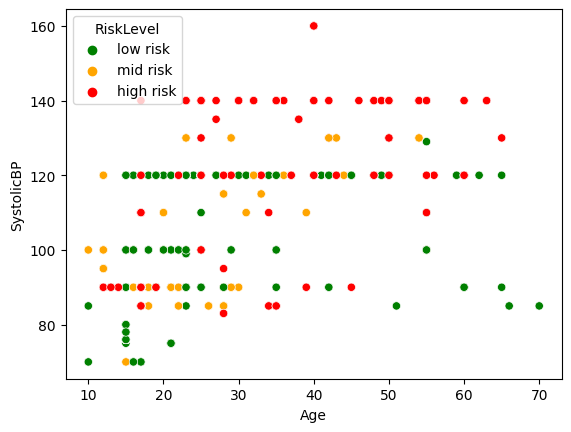

In [16]:
#Age and SystolicBP → RiskLevel

sns.scatterplot(data=data, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

* Regardless of age, pregnant women with high SystolicBP appear to have a high health risk.
* Low SystolicBP does not necessarily mean that our health risks are minimal when pregnant women are young (under 50 years of age), but it does appear that having it as they age lowers health risks.


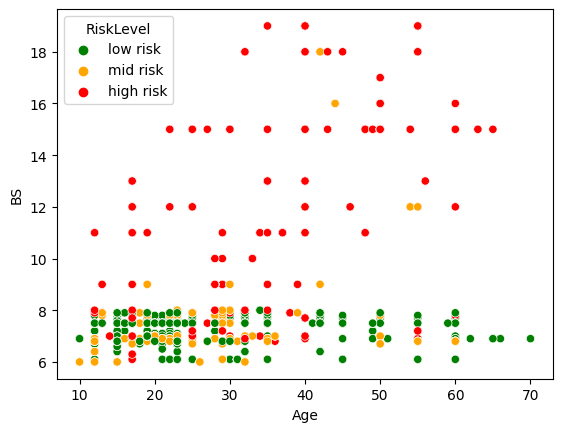

In [17]:
#Age and BS → RiskLevel

sns.scatterplot(data=data, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

* Regardless of age, pregnant women with high blood glucose levels appear to have a high health risk.

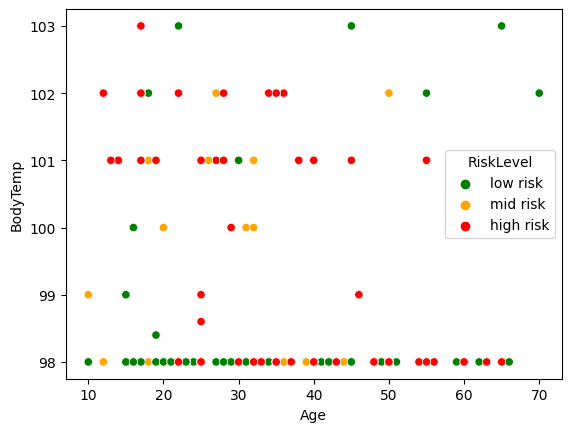

In [18]:
#Age and Bodytemp → RiskLevel

sns.scatterplot(data=data, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

* Younger women with normal body temperatures often have lower health risks; but, if their body temperatures are high, their health risks will be increased.
* There is little evidence to suggest that older women's health risks are greatly increased by high body temperatures.

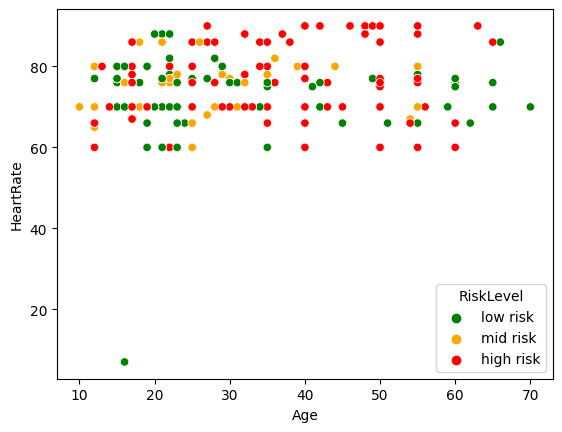

In [19]:
#Age and Heartrate → RiskLevel

sns.scatterplot(data=data, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

* Compared to age, heart rate appears to have less of an impact on the health risks for pregnant women.

### **ML Model**

The HeartRate variable is not as useful in identifying the health concerns associated with pregnancy. Therefore, it is okay to remove that variable.

In [20]:
#processed dataset

data = data.drop(['HeartRate'], axis=1)

In [21]:
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

In [22]:
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (709, 5)
y_train :  (709,)
X_test :  (305, 5)
y_test :  (305,)


Using Random Forest algorithm to build our model because it's one of the most accurate learning algorithms available, and it's training time is fast. 

In [23]:
model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8098360655737705

The model gives an accuracy score of 0.8 in predicting the level of health risk for pregnant women.